In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library

from sklearn.tree import DecisionTreeClassifier  # Decision tree algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Data import 

First we read the data into a pandas dataframe and display the first few rows.

In [60]:
df = pd.read_csv('data.csv')

# Print the first 5 rows of the DataFrame 'df'
df.head(5)

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,apaceast.cloudguest.central.arubanetworks.com,Cisco-Umbrella,legitimate,45,False,3.924535,False,0.0,4,0,0,0,False,3,0.310387,False,"{'domain_name': ['ARUBANETWORKS.COM', 'arubane...",8250.0
1,quintadonoval.com,Majestic,legitimate,17,False,3.572469,False,0.0,1,0,0,0,False,0,0.240439,False,"{'domain_name': ['QUINTADONOVAL.COM', 'quintad...",10106.0
2,nomadfactory.com,Majestic,legitimate,16,False,3.327820,False,0.0,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['NOMADFACTORY.COM', 'nomadfac...",8111.0
3,tvarenasport.com,Majestic,legitimate,16,False,3.500000,False,0.0,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['TVARENASPORT.COM', 'tvarenas...",5542.0
4,widget.cluster.groovehq.com,Cisco-Umbrella,legitimate,27,False,3.930270,False,0.0,3,0,0,0,False,2,0.352214,False,"{'domain_name': 'GROOVEHQ.COM', 'registrar': '...",5098.0


### Data preprocessing

First we check for missing values and drop the rows that contain missing values. Then we drop the columns that are not useful for our analysis.

We export the featrues and labels into two separate dataframes. We also convert the labels into numerical values.

In [61]:
df = df.dropna()
df.drop(columns=['url', 'source', 'whois_data'], inplace=True)  # drop unrelevant columns

X = df.drop(columns=['label'])

# Convert the 'label' column to a numerical value
y = df['label'].map({'legitimate': 0, 'phishing': 1})

# Stats about the dataset
print('Number of rows:', X.shape[0])
print('Number of columns:', X.shape[1])
print('Number of phishing websites:', y[y == 1].shape[0])
print('Number of legitimate websites:', y[y == 0].shape[0])

Number of rows: 1749311
Number of columns: 14
Number of phishing websites: 652908
Number of legitimate websites: 1096403


### Scaling and splitting the data

We scale the features using the StandardScaler and split the data into training and testing sets.

In [62]:

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Principal Component Analysis

We perform PCA on the features and plot the explained variance ratio. We choose the number of components such that the explained variance ratio is greater than 0.98.

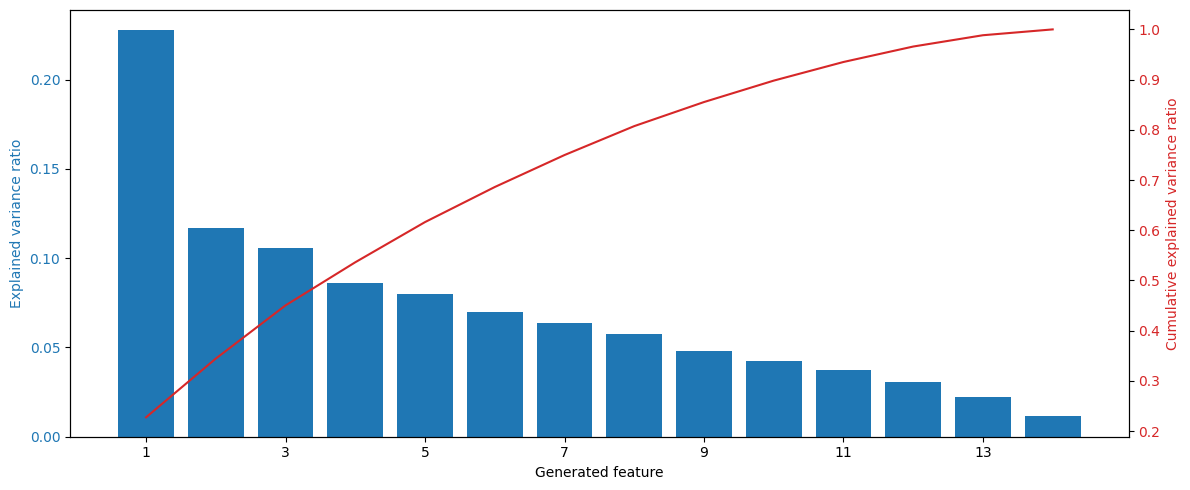

In [66]:
# Perfrom PCA and evaluate the different number of components
from sklearn.decomposition import PCA

N = 14
pca = PCA(n_components=N)
X_train_reduced = pca.fit_transform(X_train)

# plot the explained variances
fig, ax1 = plt.subplots(figsize=(12, 5))
color = 'tab:blue'
ax1.bar(1+np.arange(N), pca.explained_variance_ratio_, color=color)
ax1.set_xticks(1+np.arange(N, step=2))
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel("Explained variance ratio", color=color)
ax1.set_xlabel("Generated feature")

ax2 = ax1.twinx()
color = 'tab:red'
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(1+np.arange(N), np.cumsum(pca.explained_variance_ratio_), color=color)
ax2.set_ylabel("Cumulative explained variance ratio", color=color)
fig.tight_layout()
plt.show()

We see that the number of components is 14 which is the same as the number of features, so we do not reduce the dimensionality of the data and conclude that PCA is not useful for this dataset.

## Model building

### Decision Tree

We build a decision tree model and evaluate its performance using the accuracy score.

In [55]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 1.00


#### Metrics 

We also plot the confusion matrix and some classification metrics like precision, recall and f1-score to evaluate the model 
performance.

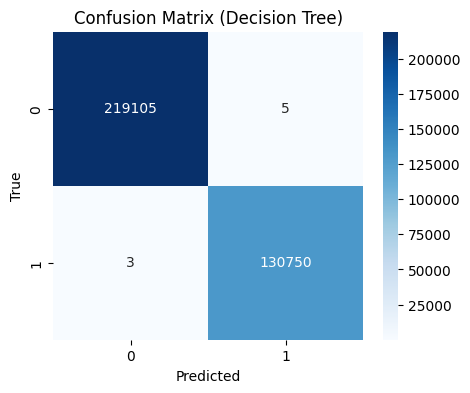

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    219110
           1       1.00      1.00      1.00    130753

    accuracy                           1.00    349863
   macro avg       1.00      1.00      1.00    349863
weighted avg       1.00      1.00      1.00    349863



In [56]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

# Recall, Precision, F1-Score
print(classification_report(y_test, y_pred))


#### Results

The decision tree model achieved a high accuracy on the test set. The confusion matrix shows that the model is able to predict the classes well. The classification metrics also show that the model has good precision, recall and f1-score.

### Logistic regression

The other model that we will use is logistic regression. This model is a linear model for binary classification. It is a simple model that is easy to interpret. It is also a good model to use as a baseline model. 

In [57]:
# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 1.00


### Metrics

We evaluate the logistic regression model using the accuracy score, confusion matrix and classification metrics.

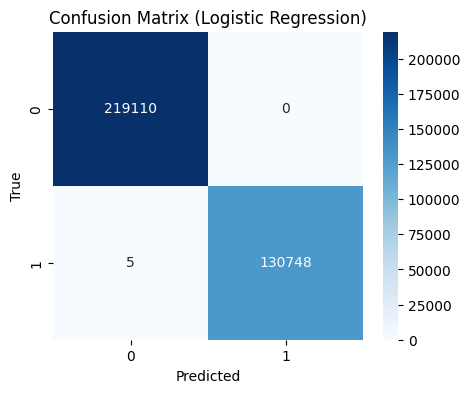

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    219110
           1       1.00      1.00      1.00    130753

    accuracy                           1.00    349863
   macro avg       1.00      1.00      1.00    349863
weighted avg       1.00      1.00      1.00    349863



In [58]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Recall, Precision, F1-Score
print(classification_report(y_test, y_pred))

#### Results

The accuracy of the logistic regression model is high. It is compareable tot the accuracy of the decision tree model. Even though the accuracy is similar, the logistic regression model is a better model because it is simpler and easier to interpret. From the confusion matrix and other metrix we can see how well the model predicts the training data, with only a few false positives and false negatives.